In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fifaindex_21.csv')

In [3]:
df

,Name,Age,Value €,Value $,Value £,Wage €,Wage $,Wage £,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
0,Manuel Neuer,35,20500000.0,23000000.0,18500000.0,135000.0,150000.0,120000.0,46,30,17,11,10,29,87,12,30,70,70,15,60,68,54,43,80,35,60,51,77,25,68,13,16,14,11,47,11,88,88,88,91,89
1,Lionel Messi,33,103500000.0,117000000.0,93000000.0,560000.0,630000.0,500000.0,96,96,32,24,35,44,94,93,40,95,96,85,91,91,91,72,69,95,80,91,68,70,86,95,94,93,94,75,88,14,6,11,15,8
2,Jan Oblak,28,120000000.0,135500000.0,108000000.0,125000.0,140000.0,110000.0,30,12,27,18,12,34,88,11,19,65,68,13,43,40,43,41,78,49,60,67,78,15,59,11,12,13,14,11,13,90,87,92,78,90
3,Kalidou Koulibaly,29,76500000.0,86500000.0,69000000.0,140000.0,155000.0,125000.0,74,69,91,87,89,87,85,35,87,52,82,30,74,63,73,70,94,41,77,52,82,84,55,22,15,28,28,33,14,13,7,11,7,5
4,N'Golo Kanté,30,78000000.0,88000000.0,70000000.0,190000.0,215000.0,170000.0,80,79,89,85,90,90,91,72,91,79,85,68,85,79,79,96,72,92,76,82,77,54,71,65,65,49,49,54,56,7,15,12,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Hazza Al Ghamdi,20,250000.0,275000.0,220000.0,2000.0,2300.0,1800.0,56,54,27,19,26,58,45,50,24,52,42,54,50,41,66,42,50,51,69,69,47,36,50,49,57,47,42,40,37,9,14,8,9,13
17996,Gustavo Nnachi,19,250000.0,275000.0,220000.0,1500.0,1600.0,1300.0,56,53,27,27,25,29,48,48,22,44,45,51,53,50,69,51,39,73,68,52,49,33,51,41,39,41,35,44,40,12,10,14,7,6
17997,Imam Jagne,17,325000.0,375000.0,300000.0,1500.0,1600.0,1300.0,48,55,51,51,53,75,56,40,52,52,42,41,48,55,68,60,58,59,69,69,58,49,52,38,35,42,40,55,42,9,6,10,10,14
17998,Kwadwo Opoku,19,230000.0,275000.0,210000.0,1500.0,1600.0,1300.0,57,56,22,14,16,35,56,47,17,53,46,28,42,38,71,51,56,70,75,68,59,41,59,56,48,49,33,63,43,9,8,13,14,12


In [4]:
df = df.drop(['Value $','Value £', 'Wage $', 'Wage £'], axis=1)

In [5]:
final_sample = df[df.isna().any(axis=1)].copy()

In [6]:
final_sample.head(5)

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
294,Rosberto Dourado,21,NaN,NaN,76,77,83,80,86,75,80,58,82,77,81,61,82,78,75,91,56,77,78,72,40,70,60,53,59,54,57,77,57,10,15,14,14,9
364,Egidio Maestre Schetino,29,NaN,NaN,72,56,84,76,83,86,85,38,82,42,71,40,74,61,83,76,73,68,78,77,69,83,53,38,41,45,49,56,44,12,16,12,13,17
371,Mauro Evidio Nérez,33,NaN,NaN,78,77,77,76,77,69,80,72,77,75,82,77,78,71,78,89,68,81,80,83,71,69,55,51,53,83,52,61,47,7,16,15,15,7
372,Jorge Ezequiel Serendero,33,NaN,NaN,21,9,12,13,17,34,78,27,23,71,67,10,18,16,41,29,79,41,42,34,67,11,58,8,7,9,18,14,8,80,78,81,77,77
375,Jaime Nicolás Frendado,37,NaN,NaN,64,60,83,82,82,86,76,58,82,50,70,40,67,58,67,60,77,63,74,61,91,80,74,56,61,72,58,62,63,17,14,15,15,19


In [7]:
df.isna().sum()

Name                0
Age                 0
Value €           248
Wage €            248
Ball Control        0
Dribbling           0
Marking             0
Slide Tackle        0
Stand Tackle        0
Aggression          0
Reactions           0
Att. Position       0
Interceptions       0
Vision              0
Composure           0
Crossing            0
Short Pass          0
Long pass           0
Acceleration        0
Stamina             0
Strength            0
Balance             0
Sprint Speed        0
Agility             0
Jumping             0
Heading             0
Shot Power          0
Finishing           0
Long Shots          0
Curve               0
FK Acc.             0
Penalties           0
Volleys             0
GK Positioning      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Reflexes         0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.head(5).iloc[:,0:]

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
0,Manuel Neuer,35,20500000.0,135000.0,46,30,17,11,10,29,87,12,30,70,70,15,60,68,54,43,80,35,60,51,77,25,68,13,16,14,11,47,11,88,88,88,91,89
1,Lionel Messi,33,103500000.0,560000.0,96,96,32,24,35,44,94,93,40,95,96,85,91,91,91,72,69,95,80,91,68,70,86,95,94,93,94,75,88,14,6,11,15,8
2,Jan Oblak,28,120000000.0,125000.0,30,12,27,18,12,34,88,11,19,65,68,13,43,40,43,41,78,49,60,67,78,15,59,11,12,13,14,11,13,90,87,92,78,90
3,Kalidou Koulibaly,29,76500000.0,140000.0,74,69,91,87,89,87,85,35,87,52,82,30,74,63,73,70,94,41,77,52,82,84,55,22,15,28,28,33,14,13,7,11,7,5
4,N'Golo Kanté,30,78000000.0,190000.0,80,79,89,85,90,90,91,72,91,79,85,68,85,79,79,96,72,92,76,82,77,54,71,65,65,49,49,54,56,7,15,12,10,10


### Normalize data

In [9]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [10]:
df.head(3)

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
0,Manuel Neuer,35,20500000.0,135000.0,46,30,17,11,10,29,87,12,30,70,70,15,60,68,54,43,80,35,60,51,77,25,68,13,16,14,11,47,11,88,88,88,91,89
1,Lionel Messi,33,103500000.0,560000.0,96,96,32,24,35,44,94,93,40,95,96,85,91,91,91,72,69,95,80,91,68,70,86,95,94,93,94,75,88,14,6,11,15,8
2,Jan Oblak,28,120000000.0,125000.0,30,12,27,18,12,34,88,11,19,65,68,13,43,40,43,41,78,49,60,67,78,15,59,11,12,13,14,11,13,90,87,92,78,90


In [11]:
df_scaled = minmax_scale(df.iloc[:,1:], feature_range=(0.1, 0.9) )

In [12]:
stats_scaled = minmax_scale(df.iloc[:,4:], feature_range=(0.1, 0.9) )

In [13]:
stats_scaled.shape

(17752, 34)

### Kmeans

We first tried unsupervised algorithm to group players according to their position. However due to the numerous noise (low-class player) in the data, we only create two class to differentiate goalkeepers from other players

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(stats_scaled)

In [16]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [17]:
kmeans.n_iter_

2

In [18]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 15902, 1: 1850}

In [19]:
df['Position'] = kmeans.labels_

In [20]:
df[['Name','Position']].head(40)

,Name,Position
0,Manuel Neuer,1
1,Lionel Messi,0
2,Jan Oblak,1
3,Kalidou Koulibaly,0
4,N'Golo Kanté,0
5,Alisson,1
6,Toni Kroos,0
7,Erling Haaland,0
8,Keylor Navas,1
9,Bruno Fernandes,0


In [21]:
df[df['Position']==1]['Name'].head(30)

0               Manuel Neuer
2                  Jan Oblak
5                    Alisson
8               Keylor Navas
11     Marc-André ter Stegen
21                   Ederson
25          Thibaut Courtois
40         Wojciech Szczęsny
42               Hugo Lloris
47          Samir Handanovič
48      Gianluigi Donnarumma
51                    De Gea
71         Kasper Schmeichel
76             Koen Casteels
83             Péter Gulácsi
113               Bernd Leno
126              Yann Sommer
134             Mike Maignan
150           Lukáš Hrádecký
164            Anthony Lopes
171              Kevin Trapp
182         Salvatore Sirigu
187         Raphaelito Anjos
201             Rui Patrício
216     Odisseas Vlachodimos
219              David Soria
220          Martin Dúbravka
227        Emiliano Martínez
229         Thomas Strakosha
230                  Pacheco
Name: Name, dtype: object

### Prepare the set

In [22]:
df.head(5)

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Position
0,Manuel Neuer,35,20500000.0,135000.0,46,30,17,11,10,29,87,12,30,70,70,15,60,68,54,43,80,35,60,51,77,25,68,13,16,14,11,47,11,88,88,88,91,89,1
1,Lionel Messi,33,103500000.0,560000.0,96,96,32,24,35,44,94,93,40,95,96,85,91,91,91,72,69,95,80,91,68,70,86,95,94,93,94,75,88,14,6,11,15,8,0
2,Jan Oblak,28,120000000.0,125000.0,30,12,27,18,12,34,88,11,19,65,68,13,43,40,43,41,78,49,60,67,78,15,59,11,12,13,14,11,13,90,87,92,78,90,1
3,Kalidou Koulibaly,29,76500000.0,140000.0,74,69,91,87,89,87,85,35,87,52,82,30,74,63,73,70,94,41,77,52,82,84,55,22,15,28,28,33,14,13,7,11,7,5,0
4,N'Golo Kanté,30,78000000.0,190000.0,80,79,89,85,90,90,91,72,91,79,85,68,85,79,79,96,72,92,76,82,77,54,71,65,65,49,49,54,56,7,15,12,10,10,0


In [23]:
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split

In [24]:
df = shuffle(df)
new_df = pd.concat([df, pd.get_dummies(df['Position'])], axis=1)

In [25]:
new_df.head(5)

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Position,0,1
5827,Francisco Venegas,22,3000000.0,13000.0,68,63,69,65,67,62,62,65,68,59,66,66,69,68,65,68,70,64,67,61,63,64,60,49,59,50,58,64,40,9,15,8,6,7,0,1,0
9808,Evann Guessand,19,1700000.0,5300.0,63,66,14,18,21,56,56,68,12,52,58,48,55,47,70,60,77,59,72,64,58,63,66,67,56,52,49,61,59,6,7,10,7,5,0,1,0
2653,Milad Mohammadi,27,3300000.0,16500.0,70,72,71,65,67,68,69,64,70,65,66,72,61,57,82,85,68,74,87,79,48,55,63,48,66,65,57,61,61,6,12,10,13,13,0,1,0
15676,Danny Whitehead,27,275000.0,2200.0,60,60,54,49,53,50,58,58,53,61,60,55,61,60,71,75,61,76,70,75,68,48,64,55,60,59,44,51,58,10,6,10,15,8,0,1,0
2219,Bernard Mensah,26,5500000.0,13000.0,77,78,68,42,62,70,70,69,68,73,72,64,76,69,82,72,73,66,78,79,61,62,80,69,71,77,78,59,49,10,15,13,12,11,0,1,0


In [26]:
df.head(5)

,Name,Age,Value €,Wage €,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,Position
5827,Francisco Venegas,22,3000000.0,13000.0,68,63,69,65,67,62,62,65,68,59,66,66,69,68,65,68,70,64,67,61,63,64,60,49,59,50,58,64,40,9,15,8,6,7,0
9808,Evann Guessand,19,1700000.0,5300.0,63,66,14,18,21,56,56,68,12,52,58,48,55,47,70,60,77,59,72,64,58,63,66,67,56,52,49,61,59,6,7,10,7,5,0
2653,Milad Mohammadi,27,3300000.0,16500.0,70,72,71,65,67,68,69,64,70,65,66,72,61,57,82,85,68,74,87,79,48,55,63,48,66,65,57,61,61,6,12,10,13,13,0
15676,Danny Whitehead,27,275000.0,2200.0,60,60,54,49,53,50,58,58,53,61,60,55,61,60,71,75,61,76,70,75,68,48,64,55,60,59,44,51,58,10,6,10,15,8,0
2219,Bernard Mensah,26,5500000.0,13000.0,77,78,68,42,62,70,70,69,68,73,72,64,76,69,82,72,73,66,78,79,61,62,80,69,71,77,78,59,49,10,15,13,12,11,0


In [27]:
Y = new_df['Value €'].values
X = new_df.drop(['Value €','Position'], axis=1).iloc[:,1:].values

In [28]:
X = X.astype('float')
X[0]

array([2.2e+01, 1.3e+04, 6.8e+01, 6.3e+01, 6.9e+01, 6.5e+01, 6.7e+01,
       6.2e+01, 6.2e+01, 6.5e+01, 6.8e+01, 5.9e+01, 6.6e+01, 6.6e+01,
       6.9e+01, 6.8e+01, 6.5e+01, 6.8e+01, 7.0e+01, 6.4e+01, 6.7e+01,
       6.1e+01, 6.3e+01, 6.4e+01, 6.0e+01, 4.9e+01, 5.9e+01, 5.0e+01,
       5.8e+01, 6.4e+01, 4.0e+01, 9.0e+00, 1.5e+01, 8.0e+00, 6.0e+00,
       7.0e+00, 1.0e+00, 0.0e+00])

In [29]:
X[:,:-2] = minmax_scale(X[:,:-2], feature_range=(0.1, 0.9) )

In [30]:
X[0]

array([0.20810811, 0.11647269, 0.65384615, 0.61304348, 0.68666667,
       0.65529412, 0.66363636, 0.58735632, 0.49384615, 0.63617021,
       0.69090909, 0.56511628, 0.61428571, 0.64545455, 0.67011494,
       0.67272727, 0.59882353, 0.62682927, 0.63333333, 0.57      ,
       0.61358025, 0.55853659, 0.54931507, 0.63636364, 0.53636364,
       0.5       , 0.59565217, 0.5       , 0.57640449, 0.63647059,
       0.44022989, 0.16292135, 0.21818182, 0.15333333, 0.13516484,
       0.14545455, 1.        , 0.        ])

In [31]:
print(f" Y's shape : {Y.shape}")
print(f" X's shape : {X.shape}")

 Y's shape : (17752,)
 X's shape : (17752, 38)


### Neural Network

In [32]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, LeakyReLU
from keras.regularizers import l1,l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [33]:
model_1 = Sequential()


model_1.add(Dense(64, input_dim=38, use_bias=True))
model_1.add(LeakyReLU())

model_1.add(Dense(64, use_bias=True))
model_1.add(Activation('relu'))

model_1.add(Dense(1))
model_1.add(Activation('relu'))

model_1.compile(loss="mean_absolute_error", optimizer='sgd', metrics="mean_absolute_error")

In [34]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2496      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 6,721
Trainable params: 6,721
Non-trainable params: 0
______________________________________________________

In [35]:
model_2 = Sequential()


model_2.add(Dense(64, input_dim=38, use_bias=False))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU())
model_2.add(Dropout(0.4))

model_2.add(Dense(64, use_bias=False))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU())

model_2.add(Dense(1))
model_2.add(Activation('relu'))

model_2.compile(loss="mean_absolute_error", optimizer=SGD(momentum=0.4), metrics="mean_absolute_error")

In [36]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)               

In [37]:
model_3 = Sequential()


model_3.add(Dense(128, input_dim=38))
model_3.add(LeakyReLU())

model_3.add(Dense(64, use_bias=False))
model_3.add(BatchNormalization())
model_3.add(LeakyReLU())
model_3.add(Dropout(0.2))

model_3.add(Dense(64, use_bias=False))
model_3.add(BatchNormalization())
model_3.add(LeakyReLU())

model_3.add(Dense(39, use_bias=False))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dense(1))
model_3.add(Activation('relu'))

model_3.compile(loss="mean_absolute_error", optimizer=SGD(momentum=0.4), metrics="mean_absolute_error")

In [38]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               4992      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8192      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [39]:
def price_format(price):
  return "{:,d}".format(round(price))

In [40]:
# Our R_squared function
def r_squared(y_true, y_pred):
  rss = np.sum(np.square(y_true - y_pred))
  tss = np.sum(np.square(y_true - np.mean(y_true)))
  
  return 1 - (rss/(tss + K.epsilon()))

In [41]:
def model_train(model, batch_length, num_epochs):

  history = model.fit(X, Y, batch_size=batch_length, epochs=num_epochs, validation_split=0.25, verbose=0)

  fig, ax = plt.subplots(2,1, figsize=(12,8))
  ax[0].plot(history.history['loss'], label ='train loss', color = 'r')
  ax[0].plot(history.history['val_loss'], label ='test loss', color = 'b')
  ax[0].set_title("Loss curves through all epochs")
  ax[0].legend()

  ax[1].plot(history.history['loss'][-200:], label ='train loss', color = 'r')
  ax[1].plot(history.history['val_loss'][-200:], label ='test loss', color = 'b')
  ax[1].set_title("Loss curves through 200 lasts epochs")
  ax[1].legend()
  
  plt.show()

  print(f"Last val_loss : {history.history['val_loss'][-1]}\n")

  print(f"Here is the R² of the model : {r_squared(Y, model.predict(X).reshape(-1))}")
  print("Knowing that R² max value (excellent model) is 1")

  random_value = np.random.randint(new_df.shape[0]+1)
  print(f"\nA RANDOM PREDICTION\nFor the player named {df['Name'][random_value]}")
  print(f"Here is the real value : {price_format(Y[random_value])} €")
  print(f"Here is the predicted value : {price_format(model.predict(X[random_value].reshape(1,38))[0][0])} €")

  print("\nMODEL PREDICTION STATS")
  print(f"Number of unique player's value : {len(np.unique(model.predict(X)))}")
  print(f"Player's mean value : {np.mean(model.predict(X))}")
  print(f"Minimal player's value : {np.min(model.predict(X))}")
  print(f"Maximal player's value : {np.max(model.predict(X))}")

  print("\nTRUE DATA STATS")
  print(f"Number of unique player's value : {len(np.unique(Y))}")
  print(f"Player's mean value : {np.mean(Y)}")
  print(f"Minimal player's value : {np.min(Y)}")
  print(f"Maximal player's value : {np.max(Y)}")

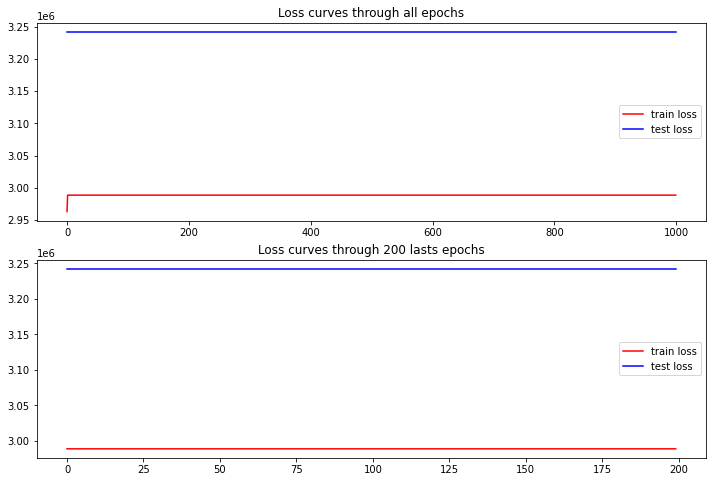

Last val_loss : 3241815.25

Here is the R² of the model : -0.15290522182032373
Knowing that R² max value (excellent model) is 1

A RANDOM PREDICTION
For the player named Álvaro Rey
Here is the real value : 3,300,000 €
Here is the predicted value : 0 €

MODEL PREDICTION STATS
Number of unique player's value : 1
Player's mean value : 0.0
Minimal player's value : 0.0
Maximal player's value : 0.0

TRUE DATA STATS
Number of unique player's value : 257
Player's mean value : 3051957.4695808925
Minimal player's value : 1000.0
Maximal player's value : 185500000.0


In [42]:
#This model does not learn anything from data
model_train(model_1, 256, 1000)

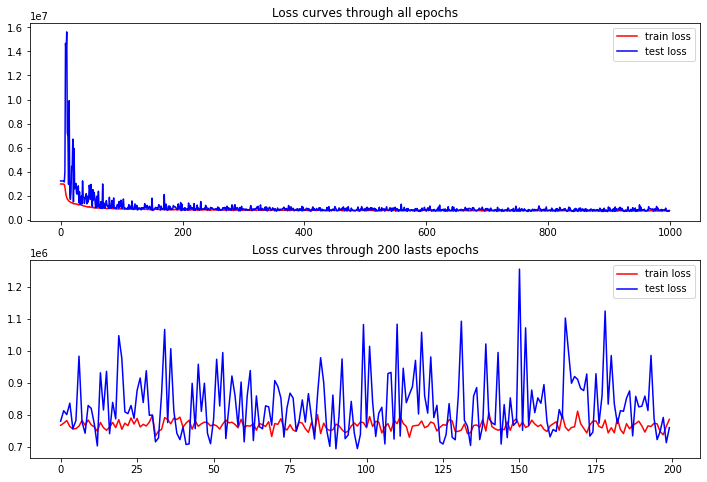

Last val_loss : 760120.5

Here is the R² of the model : 0.927017812590737
Knowing that R² max value (excellent model) is 1

A RANDOM PREDICTION
For the player named Christopher Dibon
Here is the real value : 8,500,000 €
Here is the predicted value : 5,998,049 €

MODEL PREDICTION STATS
Number of unique player's value : 17017
Player's mean value : 2921585.5
Minimal player's value : 0.0
Maximal player's value : 143551072.0

TRUE DATA STATS
Number of unique player's value : 257
Player's mean value : 3051957.4695808925
Minimal player's value : 1000.0
Maximal player's value : 185500000.0


In [43]:
model_train(model_2, 256, 1000)

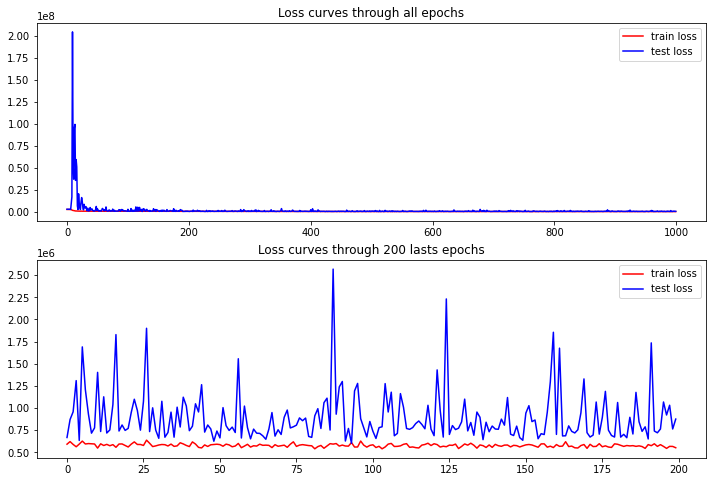

Last val_loss : 875429.3125

Here is the R² of the model : 0.9138576515694009
Knowing that R² max value (excellent model) is 1

A RANDOM PREDICTION
For the player named Carlos Vargas
Here is the real value : 700,000 €
Here is the predicted value : 986,009 €

MODEL PREDICTION STATS
Number of unique player's value : 17745
Player's mean value : 2844111.5
Minimal player's value : 8.669386863708496
Maximal player's value : 133777112.0

TRUE DATA STATS
Number of unique player's value : 257
Player's mean value : 3051957.4695808925
Minimal player's value : 1000.0
Maximal player's value : 185500000.0


In [44]:
model_train(model_3, 256, 1000)

In [45]:
#Our function to predict a player. We first normalize its data then predict with the model
def pred_player(model, input_name):
  player = new_df[new_df["Name"] == input_name].sort_index().iloc[0].copy()
  player_name = player['Name']
  player.drop(['Name','Value €','Position'],  inplace=True)

  all_player_max = new_df.drop(['Name','Value €', 'Position'], axis=1).max()
  all_player_min = new_df.drop(['Name','Value €', 'Position'], axis=1).min()

  norm_data = (player - all_player_min) / (all_player_max - all_player_min).values
  norm_data = ( ( norm_data *(0.9 - 0.1) ) + 0.1)
  norm_data.iloc[-1] = round(norm_data.iloc[-1])
  norm_data.iloc[-2] = round(norm_data.iloc[-2])

  norm_data = norm_data.astype('float')
  return model.predict(norm_data.values.reshape(-1,38))[0,0]


In [46]:
pred_player(model_3, 'Lionel Messi')

133777176.0

In [47]:
  print(f"Here is the real value : {price_format(Y[890])} €")
  print(f"Here is the predicted value by model 1 : {price_format(model_1.predict(X[890].reshape(1,38))[0][0])} €")
  print(f"Here is the predicted value by model 2 : {price_format(model_2.predict(X[890].reshape(1,38))[0][0])} €")
  print(f"Here is the predicted value by model 3 : {price_format(model_3.predict(X[890].reshape(1,38))[0][0])} €")

Here is the real value : 3,000,000 €
Here is the predicted value by model 1 : 0 €
Here is the predicted value by model 2 : 2,560,962 €
Here is the predicted value by model 3 : 2,355,077 €


In [48]:
#A function to display real value, model prediction and the difference between both

pd.set_option('display.float_format', '{:,}'.format)

df_pred=pd.DataFrame(columns=['Name','Value', 'Prediction'])

df_pred['Name']= [i for i in df.sort_index()[:100].Name]


df_pred['Value']= [round(i,0) for i in df.sort_index().loc[:99]['Value €']]

#player_stats=test.iloc[:,:].values
df_pred['Prediction']=[pred_player(model_3, player) for player in df.sort_index()['Name'].loc[:99].values]

df_pred['Difference']= round(abs(df_pred['Value']-df_pred['Prediction']),0)

df_pred[0:50]

,Name,Value,Prediction,Difference
0,Manuel Neuer,"20,500,000.0","38,463,336.0","17,963,336.0"
1,Lionel Messi,"103,500,000.0","133,777,176.0","30,277,176.0"
2,Jan Oblak,"120,000,000.0","90,927,616.0","29,072,384.0"
3,Kalidou Koulibaly,"76,500,000.0","75,060,448.0","1,439,552.0"
4,N'Golo Kanté,"78,000,000.0","58,451,760.0","19,548,240.0"
5,Alisson,"88,000,000.0","76,444,672.0","11,555,328.0"
6,Toni Kroos,"87,500,000.0","81,278,952.0","6,221,048.0"
7,Erling Haaland,"122,500,000.0","72,742,304.0","49,757,696.0"
8,Keylor Navas,"33,500,000.0","31,866,470.0","1,633,530.0"
9,Bruno Fernandes,"121,000,000.0","95,667,224.0","25,332,776.0"


### Save model

In [49]:
model_3.save("network_final.h5")

### DRAFT / Testing several learning rate for SGD

In [52]:
def test_lr():
  model = Sequential()

  model.add(Dense(64, input_dim=38
                  , use_bias=False))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model_2.add(Dropout(0.4))

  model.add(Dense(64, use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Dense(1))
  model.add(Activation('relu'))

  learning_rates=[1E-1, 1E-2 , 1E-3 , 1E-4 , 1E-5 , 1E-6]

  plt.figure(figsize=(24,15))
  for i in range(len(learning_rates)):
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)

    model.compile(loss='mean_absolute_error', optimizer=SGD(learning_rate=learning_rates[i]),
                metrics=['mean_absolute_error'])
    history = model.fit(X, Y, batch_size=256, epochs=200,
                        validation_split=0.25, verbose=0)
    plt.plot(history.history['loss'], label='train', color='r')
    plt.plot(history.history['val_loss'], label='test', color='b')

    plt.title('lrate= '+str(learning_rates[i]), pad=-50)
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.legend()
  plt.show()

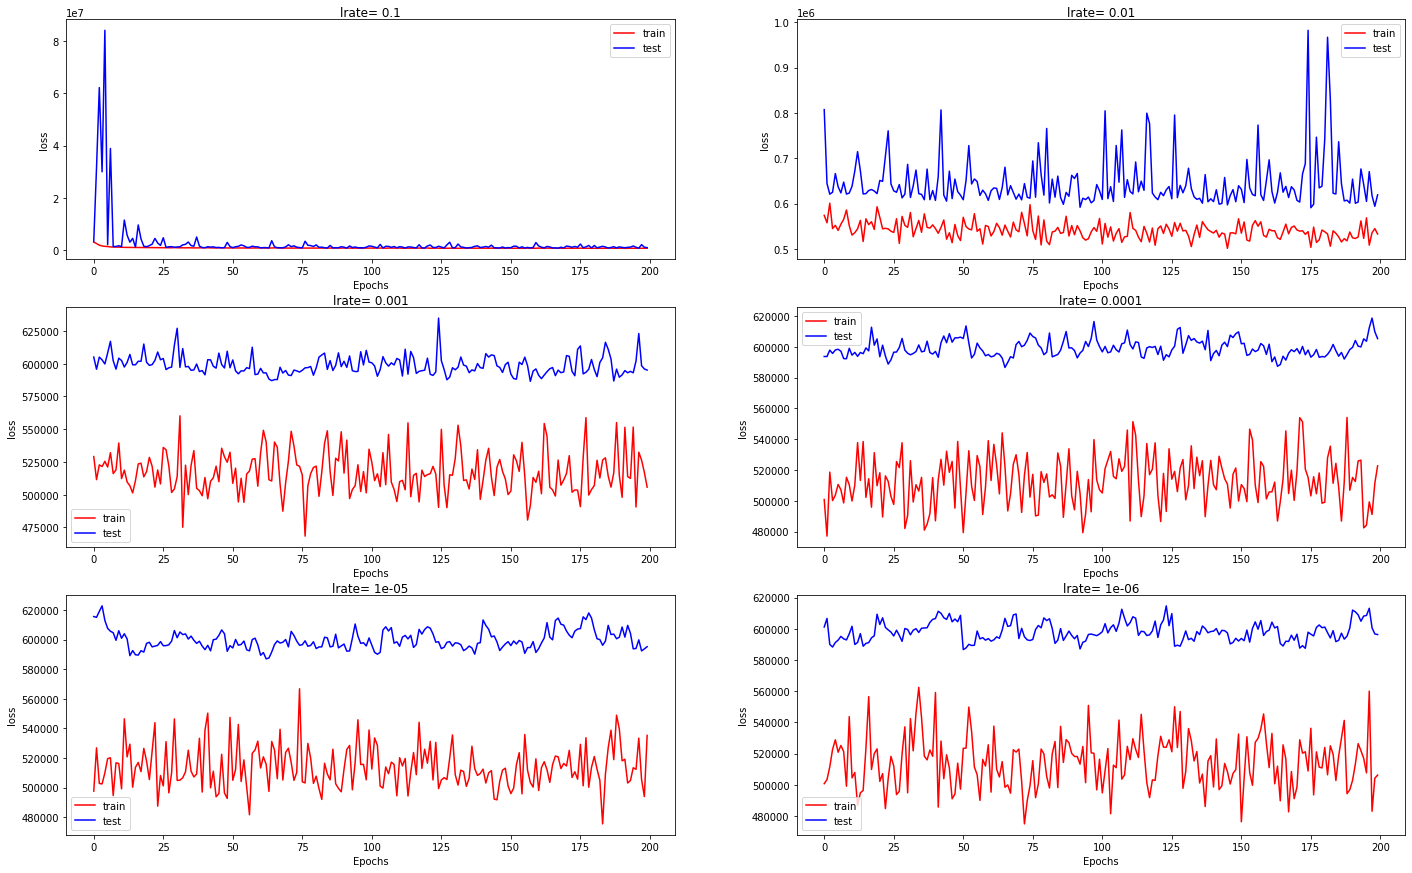

In [53]:
test_lr()